# Questions

- which gender have more chance to have heart failure?
- discover relation between maximum heart rate and (exercise-induced angina, depression)?
- discover relation between resting blood pressure and serum cholesterol and fasting blood sugar
- 

In [1]:
PROCESS_DATA_PATH = './data/Process/Processed_Heart.pkl'

In [2]:
# import the important pakages
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
heart = pd.read_pickle(PROCESS_DATA_PATH)
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Ranges,Gender,ExerciseAngina_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,36-45,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,46-55,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,36-45,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,46-55,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,46-55,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,36-45,0,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,66-80,0,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,56-65,0,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,56-65,1,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Sex                 918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingBP           918 non-null    int64  
 4   Cholesterol         918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  HeartDisease        918 non-null    int64  
 12  Age_Ranges          918 non-null    object 
 13  Gender              918 non-null    int64  
 14  ExerciseAngina_num  918 non-null    int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 107.7+ K

Univarite Exploration

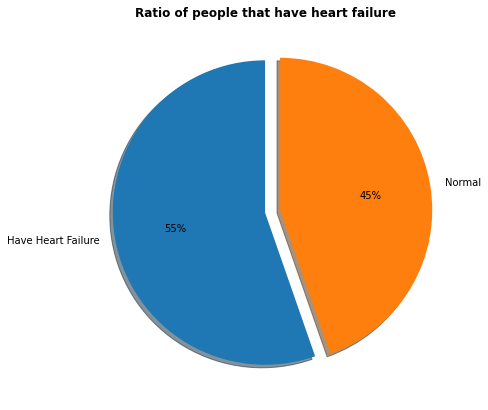

In [5]:
plt.figure(figsize=[7, 7])

x = heart.HeartDisease.value_counts()
label = ['Have Heart Failure', 'Normal']
explode = (0, 0.1)
plt.pie(x,labels=label,shadow=True ,explode=explode , startangle=90,autopct='%.0f%%');

plt.title('Ratio of people that have heart failure', weight = 'semibold');

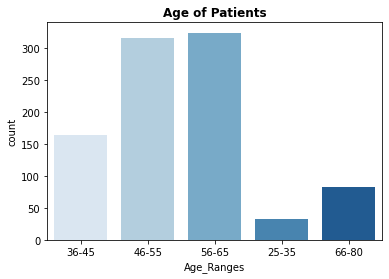

In [6]:
# heart[(heart['Sex'] == 'F') &(heart['HeartDisease'] == 1)]['Sex'].value_counts()
plt.title('Age of Patients', weight = 'bold');
sns.countplot(data=heart, x='Age_Ranges', palette='Blues');

BiVariate Exploration

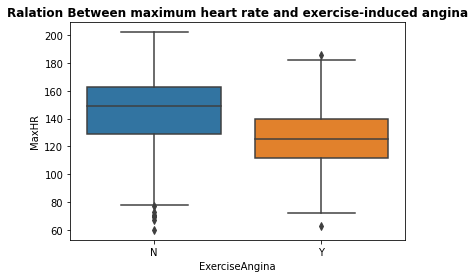

In [7]:
plt.title('Ralation Between maximum heart rate and exercise-induced angina', weight = 'bold');

sns.boxplot(data=heart, x='ExerciseAngina', y='MaxHR');

<AxesSubplot:>

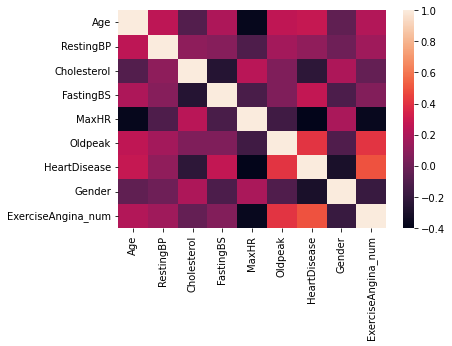

In [10]:
sns.heatmap(heart.corr())

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

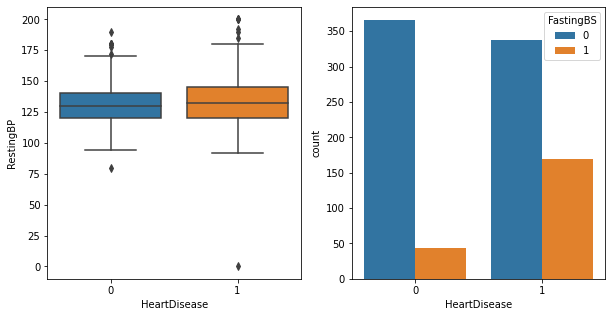

In [20]:
plt.figure(figsize = [10,5])
h = heart.HeartDisease.astype(str)
plt.subplot(1, 2, 1)
sns.boxplot(data=heart, x = h, y='RestingBP');
plt.subplot(1, 2, 2)
f = heart.FastingBS.astype(str)
sns.countplot(data=heart, x=h, hue=f)